## Customer Retention Analysis

In [1]:
# import python librariesc

import numpy as np 
import pandas as pd

In [2]:
# loading data ...
df=pd.read_csv('data.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.info() # data types and variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [4]:
df.shape # 23 variables and 12 403 columns

(12043, 23)

In [5]:
df.isnull().sum() # checking missing values

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

'card_present_flag', 'bpay_biller_code', 'merchant_id','merchant_code', 'merchant_suburb', 'merchant_state', 'merchant_long_lat' have missing values

In [6]:
df['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [7]:
df['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [8]:
df['merchant_id'].value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
0161c377-c49c-4899-917e-56c96fc17715     1
d6508847-14b8-4cb6-91d3-d72bb8ac0d33     1
af074c2f-0f00-4fd6-8bae-9431f12f099a     1
690cc41c-767b-485d-86cd-eb79f4020a03     1
50fccc48-f815-454f-ae55-ac054158f7dd     1
Name: merchant_id, Length: 5725, dtype: int64

In [9]:
df['merchant_code'].value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [10]:
df.drop(['long_lat','bpay_biller_code','merchant_id','merchant_code','merchant_suburb','merchant_long_lat'],axis=1,inplace=True)

In [11]:
df.isnull().sum() 

status                  0
card_present_flag    4326
account                 0
currency                0
txn_description         0
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
movement                0
dtype: int64

In [12]:
df.duplicated().sum() # checking for duplicates data

0

In [13]:
df["date"] = pd.to_datetime(df["date"]) # change date to datetime format

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   first_name         12043 non-null  object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_state     7717 non-null   object        
 11  extraction         12043 non-null  object        
 12  amount             12043 non-null  float64       
 13  transaction_id     12043 non-null  object        
 14  countr

# Data Analaysis

In [15]:
# import matplotlib and seaborn libraries for data visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns

In [16]:
# add new columns: day of the week, month,day of the month
def get_dom(date):
    return date.day

df['dom'] = df['date'].map(get_dom)

def get_weekday(date):
    return date.weekday()

df['weekday'] = df['date'].map(get_weekday)

month = []
for date in df["date"]:
    if date.month == 8:
        month.append("August")
    elif date.month == 9:
        month.append("September")
    elif date.month == 10:
        month.append("October")

df['month'] = month

## Visualization fo Catergical Variables

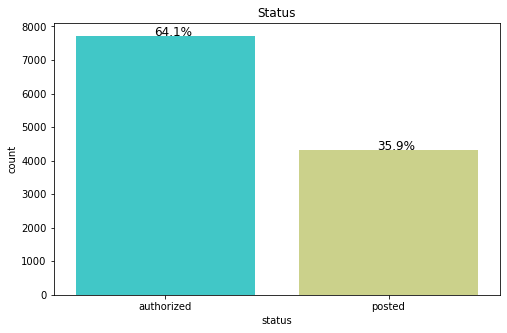

In [17]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
plt.figure(figsize=(8,5))
plt.title("Status")
ax=sns.countplot(df['status'],data=df, palette='rainbow')
without_hue(ax,df['status'])

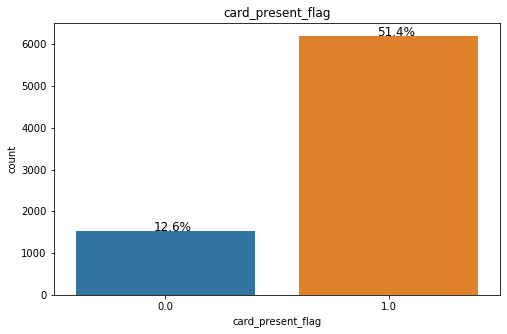

In [18]:
#using countplot
plt.figure(figsize=(8,5))
plt.title("card_present_flag")
ax=sns.countplot(df['card_present_flag'],data=df)
without_hue(ax,df['card_present_flag'])

Text(0.5, 1, 'card_present_flag VS amount')

<Figure size 576x360 with 0 Axes>

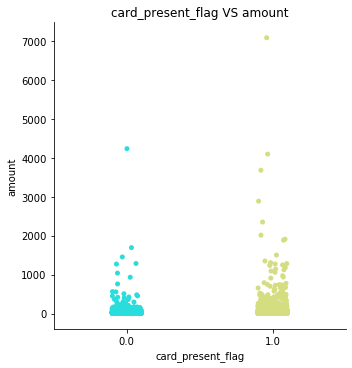

In [19]:
# using cartplot
plt.figure(figsize=(8,5))
sns.catplot(x='card_present_flag',y='amount',data=df, palette='rainbow')
plt.title("card_present_flag VS amount")

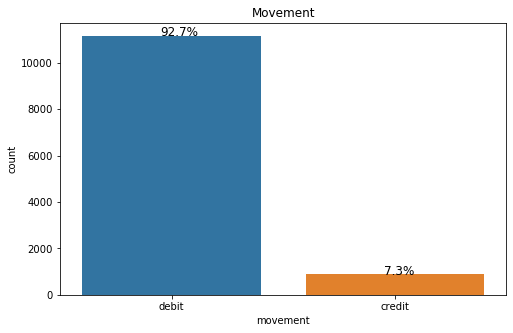

In [20]:
plt.figure(figsize=(8,5))
plt.title("Movement")
ax=sns.countplot(df['movement'],data=df)
without_hue(ax,df['movement'])

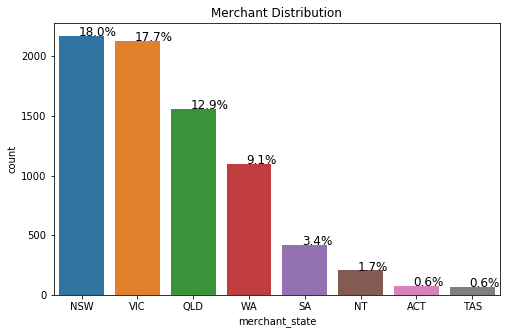

In [21]:
plt.figure(figsize=(8,5))
plt.title("Merchant Distribution")
ax = sns.countplot(df['merchant_state'],data=df,order=df['merchant_state'].value_counts().index)
without_hue(ax,df['merchant_state'])

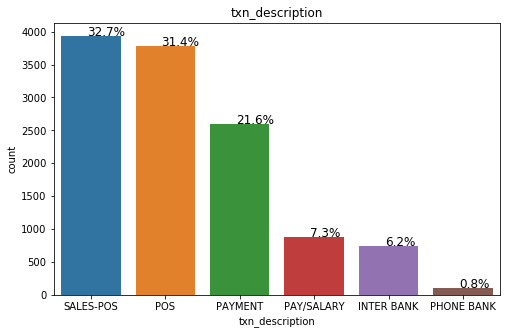

In [22]:
plt.figure(figsize=(8,5))
plt.title("txn_description")
ax = sns.countplot(df['txn_description'], data=df, order = df['txn_description'].value_counts().index)
without_hue(ax,df['txn_description'])

Text(0.5, 1.0, 'txn_description by Age')

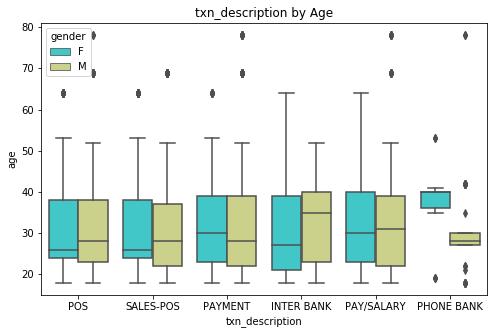

In [23]:
# usinf boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='txn_description',y='age',data=df, palette='rainbow',hue='gender')
plt.title("txn_description by Age")

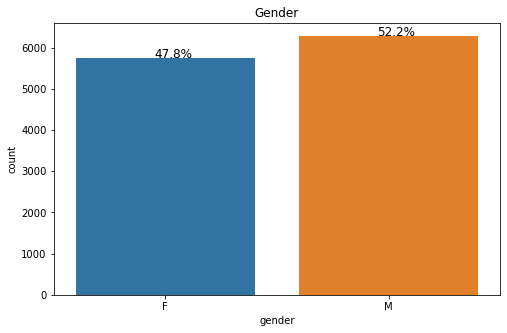

In [24]:
plt.figure(figsize=(8,5))
plt.title("Gender")
ax = sns.countplot(df['gender'], data=df)
without_hue(ax,df['gender'])

# Summary

Authorized by 64.1%, posted by 35.9%.
There are more debit transactions than credit transactions.
POS terminals are the most common type of transactions (64%).
Most clients are between the ages of 20 and 40.
Gender: Men have slightly more transactions than women, 4% higher.

# Purchase Analysis

In [25]:
df_credit=df[df['movement']=='credit']
df_credit['txn_description'].value_counts()

PAY/SALARY    883
Name: txn_description, dtype: int64

In [26]:
df_debit=df[df['movement']=='debit']

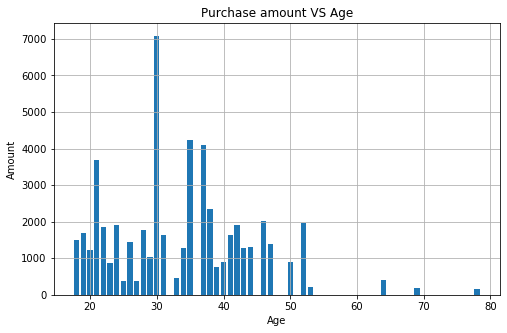

In [27]:
plt.figure(figsize=(8,5))
plt.bar(df_debit['age'], df_debit['amount'])
plt.title('Purchase amount VS Age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# Transaction Analysis

Text(0.5, 1.0, 'Transcation Frequency VS Amount')

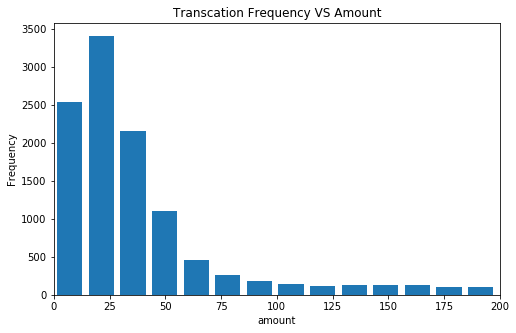

In [28]:
plt.figure(figsize=(8,5))
plt.hist(df_debit['amount'], bins = 500,rwidth=0.8)
plt.xlim(0,200)
plt.xlabel("amount")                         
plt.ylabel("Frequency")
plt.title("Transcation Frequency VS Amount")

Text(0.5, 1.0, 'Number of Transcations VS. Date of Month')

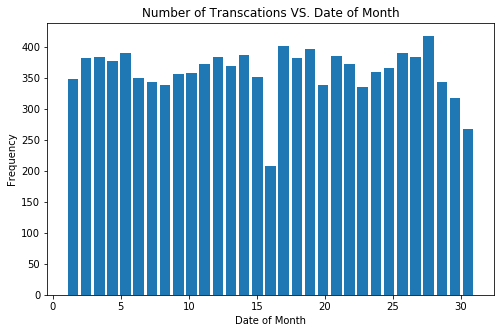

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df_debit.dom, bins = 31,rwidth=0.8)
plt.xlabel("Date of Month")                         # Less number of transaction during month's end
plt.ylabel("Frequency")
plt.title("Number of Transcations VS. Date of Month")

Text(0.5, 1.0, 'Number of Transcations VS. Day of the Week')

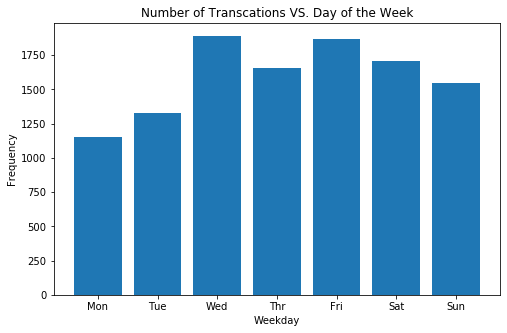

In [30]:
plt.figure(figsize=(8,5))
plt.hist(df_debit.weekday, bins=7, range=(-0.5,6.5), rwidth=0.8)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')                                   
plt.title('Number of Transcations VS. Day of the Week')

Text(0.5, 1.0, 'Transaction Volume VS. Day of the Week')

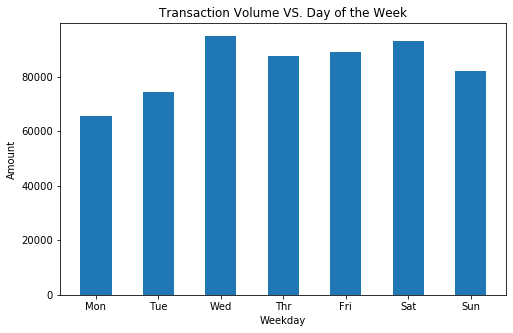

In [31]:
x=['Mon','Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
df1=df_debit.groupby('weekday')['amount'].sum()
plt.figure(figsize=(8,5))
plt.bar(x,df1,width=0.5)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Amount')                                                   
plt.title('Transaction Volume VS. Day of the Week')

Text(0.5, 1.0, 'Average Transaction Amount VS. Day of the Week')

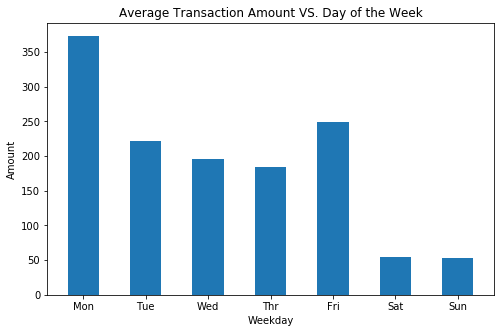

In [32]:
x=['Mon','Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
df_mean=df.groupby('weekday')['amount'].mean()
plt.figure(figsize=(8,5))
plt.bar(x,df_mean,width=0.5)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Amount')                                                   
plt.title('Average Transaction Amount VS. Day of the Week')

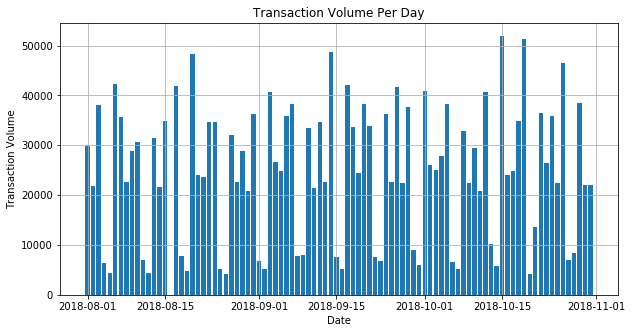

In [33]:
plt.figure(figsize=(10,5))
volume_by_day = df.groupby('date').sum()
plt.bar(volume_by_day.index, volume_by_day['amount'])
plt.title('Transaction Volume Per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.grid(True)
plt.show()

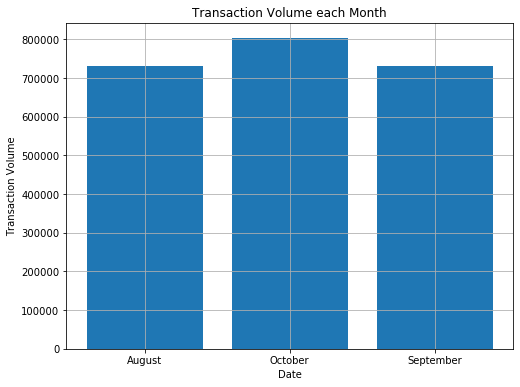

In [34]:
plt.figure(figsize=(8,6))
volume_by_day = df.groupby('month').sum()
plt.bar(volume_by_day.index, volume_by_day['amount'])
plt.title('Transaction Volume each Month')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.grid(True)
plt.show()

In [35]:
df_cus_aug = df[df['month'] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df['month'] == "August"].groupby("gender").mean()

mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
n_points = len(df_cus_aug["age"])

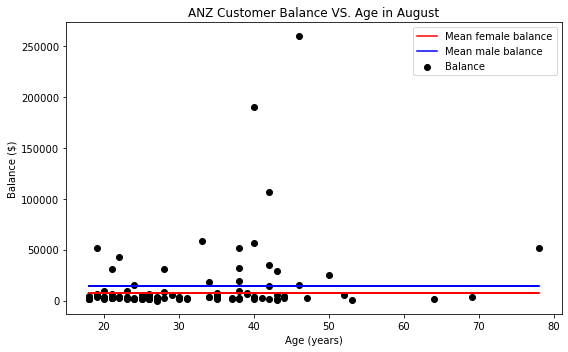

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(df_cus_aug["age"], df_cus_aug["balance"], c="black", label="Balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance VS. Age in August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

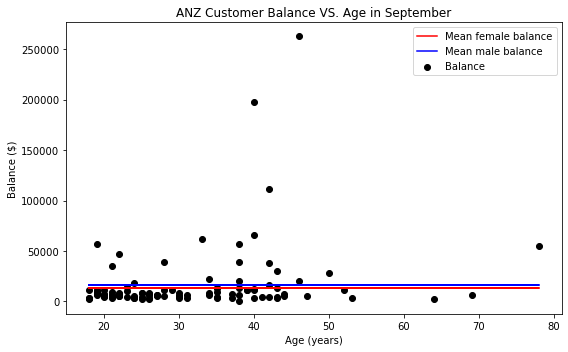

In [37]:
df_cus_sep = df[df['month'] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df['month'] == "September"].groupby("gender").mean()

mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
n_points = len(df_cus_sep["age"])

plt.figure(figsize=(8,5))
plt.scatter(df_cus_sep["age"], df_cus_sep["balance"], c="black", label="Balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance VS. Age in September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

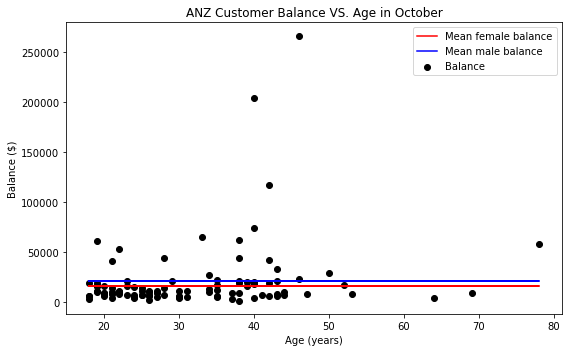

In [38]:
df_cus_oct = df[df['month'] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df['month'] == "October"].groupby("gender").mean()

mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
n_points = len(df_cus_oct["age"])

plt.figure(figsize=(8,5))
plt.scatter(df_cus_oct["age"], df_cus_oct["balance"], c="black", label="Balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance VS. Age in October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

# Salary Analysis

In [39]:
df_salary = df_credit.groupby(by=['customer_id', 'month'], as_index = False).sum()
df_salary.rename(columns={'amount': 'monthly_salary'}, inplace=True)
df_salary.drop(['age','dom'], axis=1,inplace=True)
df_salary.head(6)

,customer_id,month,card_present_flag,balance,monthly_salary,weekday
0,CUS-1005756958,August,0.0,6363.18,3881.88,4
1,CUS-1005756958,October,0.0,38701.45,4852.35,5
2,CUS-1005756958,September,0.0,16278.02,3881.88,4
3,CUS-1117979751,August,0.0,14693.52,7157.30,0
4,CUS-1117979751,October,0.0,46695.90,10735.95,0
5,CUS-1117979751,September,0.0,22311.00,7157.30,0


In [40]:
df_annual_salary = df_credit.groupby(by=['customer_id'], as_index = False).sum()
df_annual_salary.drop(['age','dom','balance','weekday'], axis=1,inplace=True)
df_annual_salary['annual_salary']=df_annual_salary['amount']*4
df_annual_salary.rename(columns={'amount': 'three_month_salary'}, inplace=True)
df_annual_salary.head(6)

,customer_id,card_present_flag,three_month_salary,annual_salary
0,CUS-1005756958,0.0,12616.11,50464.44
1,CUS-1117979751,0.0,25050.55,100202.20
2,CUS-1140341822,0.0,11499.06,45996.24
3,CUS-1147642491,0.0,22248.07,88992.28
4,CUS-1196156254,0.0,27326.11,109304.44
5,CUS-1220154422,0.0,15976.52,63906.08


# prediction ofsalary for each customer

In [41]:
data_feature= df_debit[['customer_id', 'age','balance','gender','amount']]

# one hot encoding for gender( 1= male, 0= female)
customer_data = pd.get_dummies(data_feature, columns = ['gender'], drop_first = True)

df_final_temp=pd.merge(df_annual_salary,customer_data,on='customer_id')
df_final=df_final_temp.groupby(['customer_id']).mean().reset_index()

In [42]:
df_final.to_csv('pred.csv')

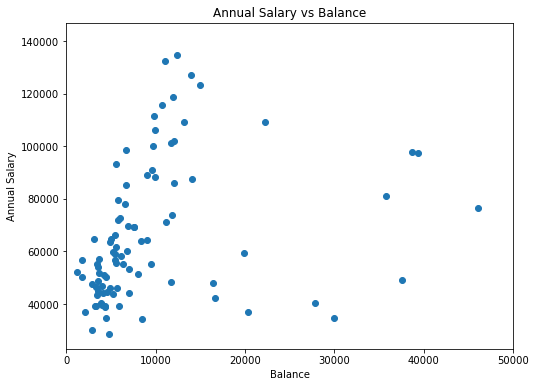

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['balance'], df_final['annual_salary'])
plt.xlim(0,50000)
plt.title('Annual Salary vs Balance')
plt.xlabel('Balance')
plt.ylabel('Annual Salary')
plt.show()

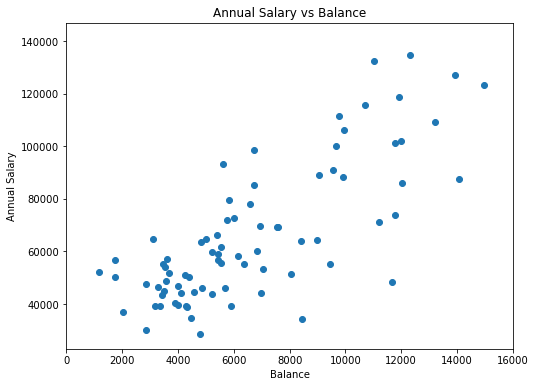

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['balance'], df_final['annual_salary'])
plt.xlim(0,16000)
plt.title('Annual Salary vs Balance')
plt.xlabel('Balance')
plt.ylabel('Annual Salary')
plt.show()

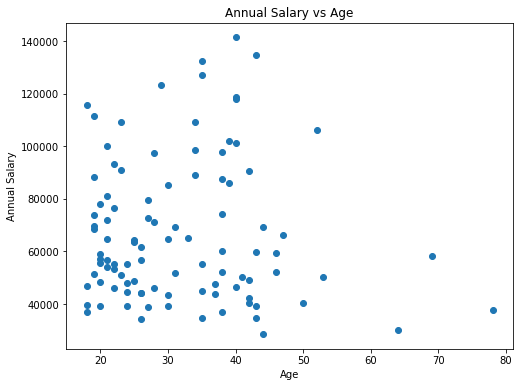

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['age'], df_final['annual_salary'])
plt.title('Annual Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.show()

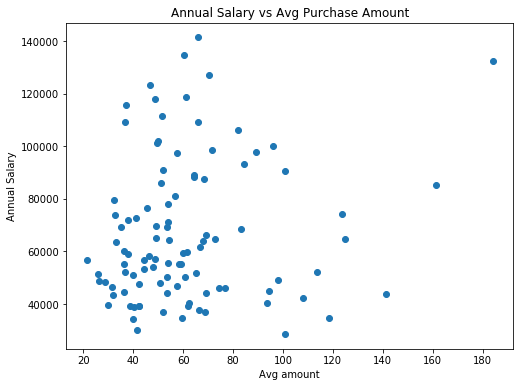

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['amount'], df_final['annual_salary'])
plt.title('Annual Salary vs Avg Purchase Amount')
plt.xlabel('Avg amount')
plt.ylabel('Annual Salary')
plt.show()

# Conclusions and Recommendations

* The distribution of the amount of purchases shows that Clients aged 30 to 40 have the highest purchasing power.
* Clients aged between 30 and 40 are the target clients of financial products
* Clients with annual salaries over $100,000 typically have balances over $10,000. They are target customers for personal loans and mortgages.
* Less buying activity occurred on Monday and Tuesday. Promotions can be organized Wednesday through Sunday to encourage customers to use credit or debit cards.
* Incentive plan includes triple points, cashback or discount.